# **correlation.ipynb**
---
- **概要**
    - S&P500のデータとS&P500Twitterセンチメント指数のデータの動きを把握する
    - S&P500のデータとS&P500Twitterセンチメント指数の相関を把握する

# **0. ライブラリーインポート**
---
- **解説**
    - 今回のデータ確認に必要なライブラリーをインポートする。

In [74]:
# ライブラリーインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

# **1. データの読み込みと前処理**
---
- **解説**
    - 本分析で用いるデータの読み込み、分析に必要なデータ加工を施す
    - df1はS&P500、df2はS&P500Twitterセンチメント指数を読みこむ
    - 最終的にS&P500の終値、S&P500Twitterセンチメント指数、S&P500の１日ずらした終値のカラムになるようにデータフレームを加工する。

In [75]:
# データの読み込み
df1 = pd.read_csv("../data/S&P500_finance.csv",encoding='shift-jis')
df2 = pd.read_csv("../data/S&P500_sentiment.csv", encoding='shift-jis')

# データのカラム名を指定
data1 = 'S&P500_finance'
data2 = 'S&P500_sentiment'
data3 = 'S&P500_finance_late_1'

# データカラム名の変更
df1 = df1.rename(columns={'日付け': 'Date'})
df2 = df2.rename(columns={'S&P 500 Twitter Sentiment Index (USD)': 'Sentiment'})
df2 = df2.rename(columns={'発効日': 'Date'})

In [76]:
# データの結合
df1_close = df1["終値"]
df = pd.concat([df1_close, df2], axis=1)
df = df.reindex(columns=['Date', '終値', 'Sentiment'])
df = df.rename(columns={'終値': data1, 'Sentiment': data2})

# data1とdata2の列を数値データに変換
df[data1] = pd.to_numeric(df[data1].str.replace(',', ''), errors='coerce')
df[data2] = pd.to_numeric(df[data2], errors='coerce')

In [77]:
# データを1日ズラしたものを横に付け加える
df_1day = df["S&P500_finance"][1:252]
df_1day =df_1day.reset_index(drop=True)
df[data3]=df_1day

In [78]:
# 最終的なデータフレームを確認する
df

,Date,S&P500_finance,S&P500_sentiment,S&P500_finance_late_1
0,2022/7/20,3959.90,148.92,3998.95
1,2022/7/21,3998.95,150.05,3961.63
2,2022/7/22,3961.63,149.44,3966.84
3,2022/7/25,3966.84,149.95,3921.05
4,2022/7/26,3921.05,149.29,4023.61
...,...,...,...,...
247,2023/7/14,4505.42,160.90,4522.79
248,2023/7/17,4522.79,161.49,4554.98
249,2023/7/18,4554.98,162.66,4565.72
250,2023/7/19,4565.72,162.98,4534.87


# **2. データの確認**
---
- **解説**
    - 以上で作成したデータフレームを元にグラフを描画し、データの概要について把握していく。

## 2.1. S&P500の時系列グラフの描画
---
- **解説**
    - S&P500の時系列グラフを描画する
    - x軸は日付、y軸はS&P500の値をプロットする
    - 値動きとしては3600$から4600$の間で値が上昇・降下している
    - 多少の周期性もグラフから見ることができる

([<matplotlib.axis.XTick at 0x7efd048a4910>,
 [Text(0, 0, '2022/7/20'),
  Text(20, 0, '2022/8/17'),
  Text(40, 0, '2022/9/15'),
  Text(60, 0, '2022/10/13'),
  Text(80, 0, '2022/11/10'),
  Text(100, 0, '2022/12/9'),
  Text(120, 0, '2023/1/10'),
  Text(140, 0, '2023/2/8'),
  Text(160, 0, '2023/3/9'),
  Text(180, 0, '2023/4/6'),
  Text(200, 0, '2023/5/5'),
  Text(220, 0, '2023/6/5'),
  Text(240, 0, '2023/7/5'),
  Text(260, 0, '')])

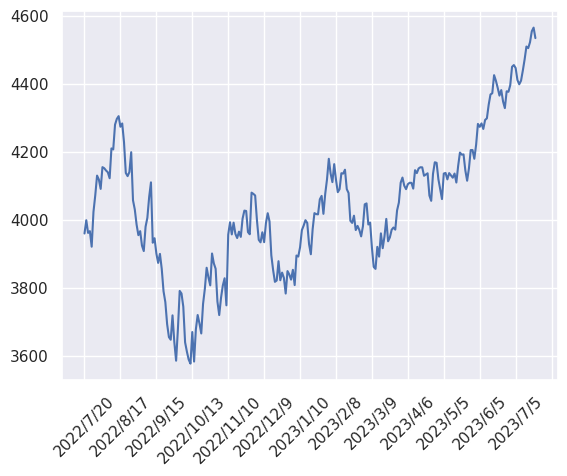

In [79]:
# x軸とy軸の指定
x = df["Date"]
y = df["S&P500_finance"]

# グラフの描画
plt.plot(x,y)
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260], rotation=45)

## 2.2. S&P500Twitterセンチメント指数の時系列グラフの描画
---
- **解説**
    - S&P500Twitterセンチメント指数の時系列グラフを描画する
    - x軸は日付、y軸はS&P500Twitterセンチメント指数の値をプロットする
    - 動きとしては135から160の間で値が上昇・降下している
    - 多少の周期性がグラフから見ることができる。
    - 見た目の範囲ではあるが、S&P500の値動きと類似性が見られる。

([<matplotlib.axis.XTick at 0x7efd04932d70>,
 [Text(0, 0, '2022/7/20'),
  Text(20, 0, '2022/8/17'),
  Text(40, 0, '2022/9/15'),
  Text(60, 0, '2022/10/13'),
  Text(80, 0, '2022/11/10'),
  Text(100, 0, '2022/12/9'),
  Text(120, 0, '2023/1/10'),
  Text(140, 0, '2023/2/8'),
  Text(160, 0, '2023/3/9'),
  Text(180, 0, '2023/4/6'),
  Text(200, 0, '2023/5/5'),
  Text(220, 0, '2023/6/5'),
  Text(240, 0, '2023/7/5'),
  Text(260, 0, '')])

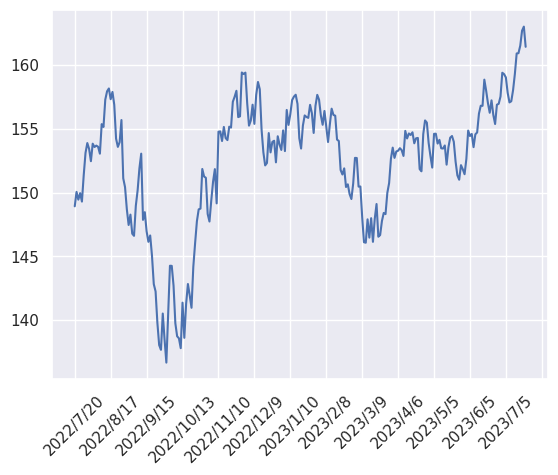

In [80]:
# x軸とy軸の指定
x = df["Date"]
y = df["S&P500_sentiment"]

# グラフの描画
plt.plot(x,y)
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260], rotation=45)

# 3. 相関の確認
---
- **解説**
    - S&P500とS&P500Twitterセンチメント指数の相関を計算し、グラフを描画させてデータの関係を確認する。

## 3.1. ピアソンの相関係数
---
- **解説**
    - S&P500とS&P500Twitterセンチメント指数の相関を計算する。
    - 本分析ではピアソンの相関係数を使用して、計算をする。
    - 相関係数は0.780であった。比較的、データとして相関があることが数値から見て取れる。
    - さらに相関を図にプロットしたところ、図からも正の相関を伺うことができる。

In [81]:
# 相関を計算
correlation, _ = pearsonr(df[data1], df[data2])
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.780


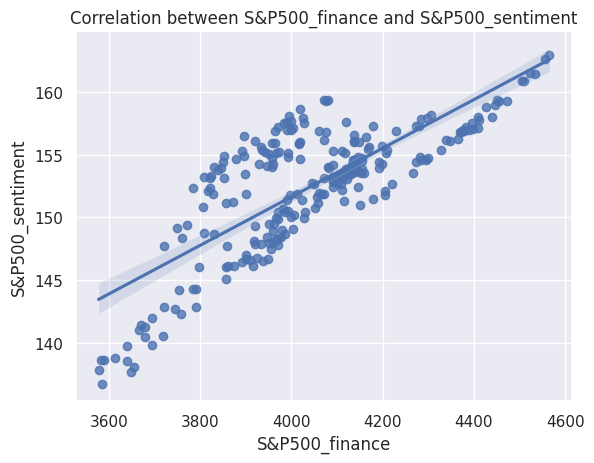

In [82]:
# データの散布図を作成し、回帰直線を描画
sns.regplot(x=df[data1], y=df[data2], data=df)
plt.title('Correlation between {} and {}'.format(data1, data2))
plt.show()

## 3.2. １日ずらしたパターンの相関係数の計算
---
- **解説**
    - 本解析では、入力値の１日後の値を出力値として算出する。予測に大きな影響は無いと見られるが、念の為相関関係を確認しておく。
    - １日ずらしたS&P500とS&P500Twitterセンチメント指数の相関を計算する。
    - ピアソンの相関係数を使用して、計算をする。
    - 相関係数は0.748であった。日付をずらさないパターンと比べて相関は下がったが、依然として強い正の相関が見られた。
    - プロット図より、データのバラツキは多少拝見できるが、正の相関を確認することができる。

In [83]:
# 相関を計算
re_df_data3 = df[data3][0:251]
re_df_data2 = df[data2][0:251]
correlation, _ = pearsonr(re_df_data3, re_df_data2)
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.748


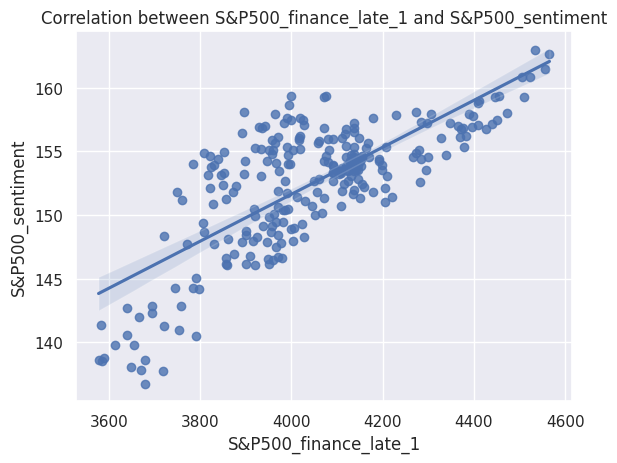

In [84]:
# データの散布図を作成し、回帰直線を描画
sns.regplot(x=df[data3], y=df[data2], data=df)
plt.title('Correlation between {} and {}'.format(data3, data2))
plt.show()